# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 9382 Павлов Роман и Поплавский Иван. Вариант №8

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Основные теоретические положения
<b>Дискретный единичный скачок</b> определяется как\
\
$\begin{equation}
    \sigma_d(k) =
        \begin{cases}
        1, k \ge 0\\
        0, k < 0
        \end{cases}
 \end{equation}
$, $k \in \mathbb{Z}$

<b>Дискретная экспоненциальная функция</b>:\
\
$\begin{equation}
    s(k) =
        \begin{cases}
        0, k < 0\\
        a^k, k \ge 0
        \end{cases}
 \end{equation}
$, $k \in \mathbb{Z}$
, где a - известная экспонента.

<b>Дискретный гармонический сигнал:<b> $s(k) = Ccos(\hat{\omega_0}k)$

<b>Периодический дискретный прямоугольный импульс:<b> $\displaystyle s(k) = A\cdot \big(-1\big)^{\big\lfloor \frac{2k}{T}\big\rfloor}, k \in \mathbb Z$

<b>Линейная комбинация дискретных гармонических сигналов:<b> $s(k) = a_1k_1(k) + a2k_2(k) + a_3x_3(k), k \in \mathbb Z$

<b>Дискретный прямоугольный импульс:<b> $s(k) =
\begin{cases}
    \displaystyle U,        & \quad n_0 \leq k \leq n_0 + n_{imp} = 1, k \in \mathbb Z\\
    0  & \quad \text{else}
  \end{cases}$

## Выполнение работы

In [2]:
# Значения для варианта 8
import numpy as np
import matplotlib.pyplot as plt

Nb = 8 # Номер бригады
N = 30 + Nb%5 # Длина последовательности
a = (-1)**Nb * (0.8 + 0.005*Nb) # Основание экспоненты
C = 1 + Nb%5 # Амплитуда гармонического сигнала
w0 = np.pi/(6+Nb%5) # Частота гармонического сигнала
U = Nb # Амплитуда импульса
n0 = 3 + Nb%5 # Начальный момент импульса
n_imp = 5 + Nb%5 # Длина импульса
# Амплитуды гармонических сигналов
B1 = 1.5 + Nb%5
B2 = 5.7 - Nb%5
B3 = 2.2 + Nb%5
# Частоты гармонических сигналов
w1 = np.pi/(4 + Nb%5)
w2 = np.pi/(8 + Nb%5)
w3 = np.pi/(16 + Nb%5)
# Коэффициенты линейной комбинации гармонических сигналов
a1 = 1.5 - Nb%5
a2 = 0.7 + Nb%5
a3 = 1.4 + Nb%5

1. Смоделировать дискретный прямоугольный импульс:
$$\begin{equation}
    s_1 =
        \begin{cases}
        U, & n_0 \leqslant k \leqslant n_0 +n_{imp} -1;\\
        0, \text{иначе}\\
        \end{cases}
 \end{equation}
$$

на основе дискретного единичного скачка $\delta_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0, N-1]$ Пояснить как выполняется моделирование импульса.

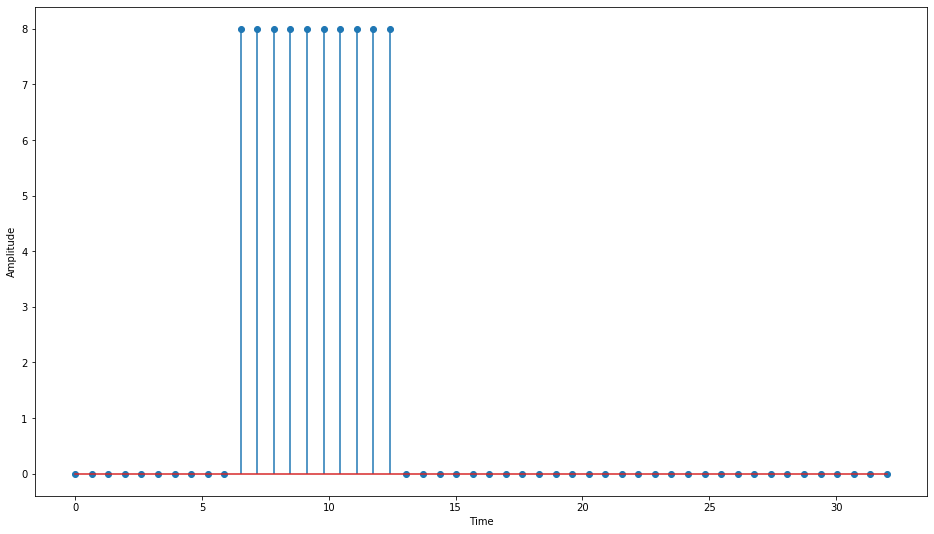

In [3]:
sigma_d = lambda x: 1 if x >= 0 else 0
s1 = lambda k: U * sigma_d(k) if n0 <= k <= n0 + n_imp - 1 else 0
n = np.linspace(0, N - 1)

plt.figure(figsize=(16,9))
plt.stem(n, np.array([s1(k) for k in n]), use_line_collection=True)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Моделирование дискретного прямоугольного импульса происходит путем включения дискретного единичного скачка начиная с $n_0$, который длиться $n_{imp}$ с амплитудой $U$

2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k):$
$$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k)$$, где
$$x_i(k) = B_isin(\hat{\omega_ik}), i=1,2,3$$
с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N -1]$.  Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор E) и среднюю мощность последовательности $s_2(k)$ (идентификатор P). Пояснить:
> a. операции при моделировании линейной комбинации сигналов $s_2(k)$
> b. как определяют указанные характеристики.

Итоговый сигнал $s2(k)$ является суммой гармонических сигналов $x_i$, при этом каждый из них домножается на свою константу

Определение указаных характеристик<br>
Среднее значение:
$$ means2 = \frac{\sum_{k=0}^{N-1} s_2(k)}{N} $$
Энергия:
$$E = \sum_{k=0}^{N-1}|s_2(k)|^2$$
Средняя мощность:
$$P = \frac{E}{T}$$

In [4]:
x1 = lambda x: B1*np.sin(w1*k)
x2 = lambda x: B2*np.sin(w2*k)
x3 = lambda x: B3*np.sin(w3*k)

k = np.linspace(0, 5*N-1, 5*N)

s2 = lambda x: a1*x1(x) + a2*x2(x) + a3*x3(x)

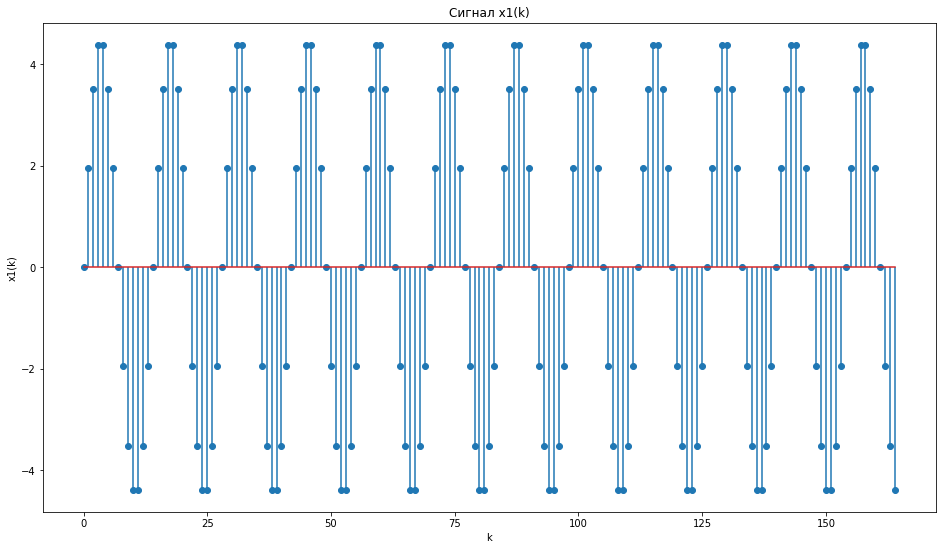

In [5]:
plt.figure(figsize=(16,9))
plt.stem(k, x1(k), use_line_collection=True)
plt.xlabel("k")
plt.ylabel("x1(k)")
plt.title("Сигнал x1(k)")
plt.show()

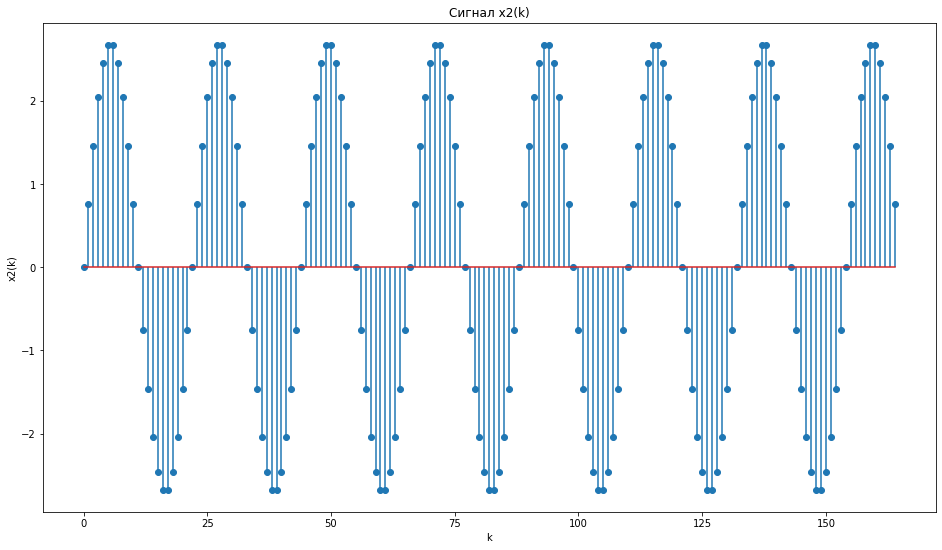

In [6]:
plt.figure(figsize=(16,9))
plt.stem(k, x2(k), use_line_collection=True)
plt.xlabel("k")
plt.ylabel("x2(k)")
plt.title("Сигнал x2(k)")
plt.show()

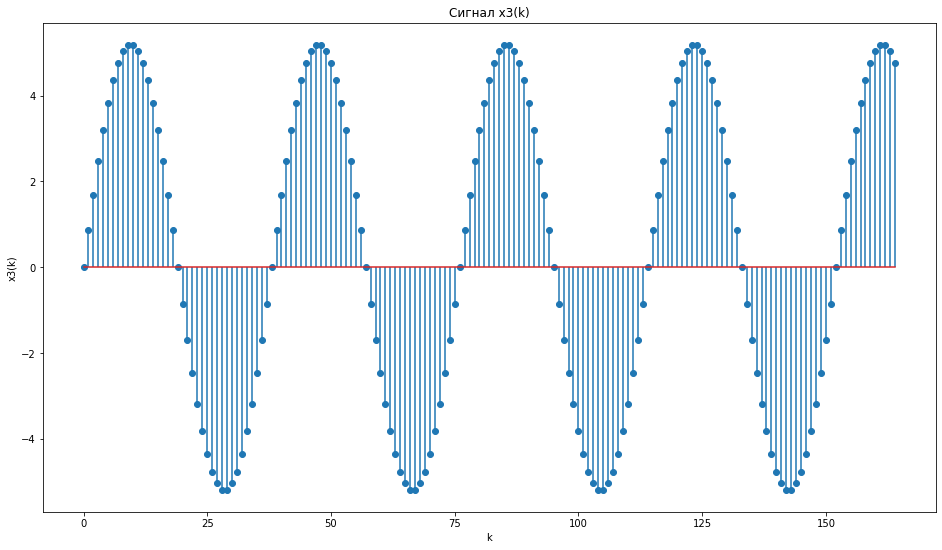

In [7]:
plt.figure(figsize=(16,9))
plt.stem(k, x3(k), use_line_collection=True)
plt.xlabel("k")
plt.ylabel("x3(k)")
plt.title("Сигнал x3(k)")
plt.show()

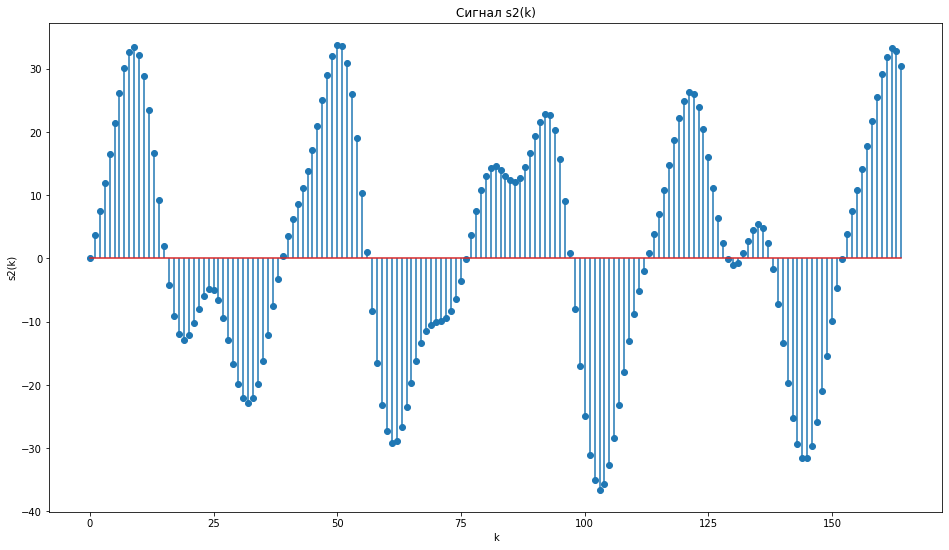

In [8]:
plt.figure(figsize=(16, 9))
plt.stem(k, s2(k), use_line_collection=True)
plt.xlabel("k")
plt.ylabel("s2(k)")
plt.title("Сигнал s2(k)")
plt.show()

In [9]:
print(f"Среднее значение s2: {np.mean(s2(k))}")
print(f"Энергия: {np.sum(s2(k)**2)}")
print(f"Средняя энергия последовательности: {np.sum(s2(k)**2)/len(k)}")

Среднее значение s2: 1.5678183541399593
Энергия: 57255.466663179
Средняя энергия последовательности: 347.0028282616909


3. Вывести график дискретного сигнала $s_3(k)$ представляющего собой дискретный гармонический сигнал $s(k)$
$$s(k) = Ccos(\hat{\omega_0}k)$$ с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N - 1]$. Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

Для того, чтобы получить дискретный гармонический сигнал с экспоненциальной огибающей необходимо домножить исходный сигнал на $|a|^k$
$$s3(k) = |a|^k * Ccos(\hat{\omega_0}k)$$

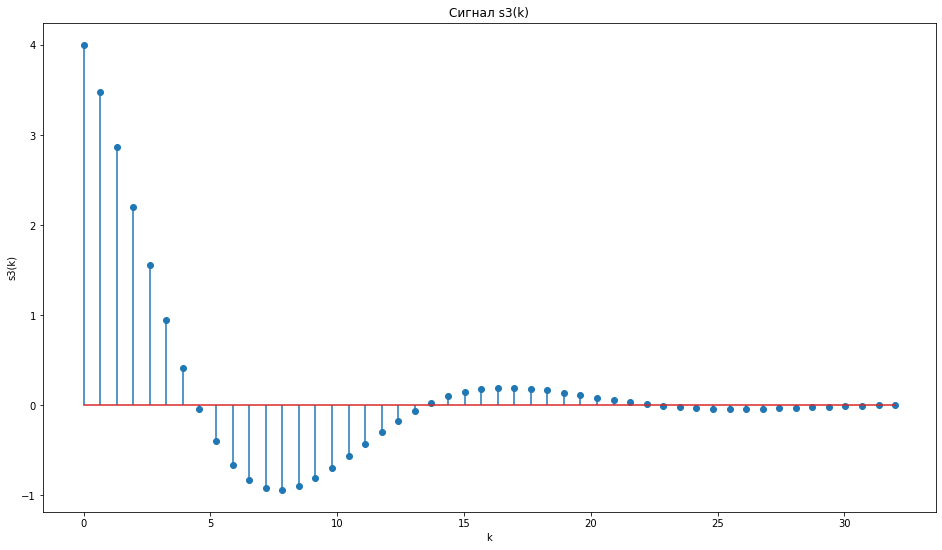

In [10]:
k = np.linspace(0, N-1)

s3 = lambda x: np.abs(a)**x*C*np.cos(w0 * x)

plt.figure(figsize=(16, 9))
plt.stem(k, s3(k), use_line_collection=True)
plt.xlabel("k")
plt.ylabel("s3(k)")
plt.title("Сигнал s3(k)")
plt.show()

4. Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

Для моделирования данного сигнала модифицируем сигнал из 1 задания чтобы сигнал имел амплитуду $U$, только если $k mod 3n_{imp} < n_{imp}$, тогда получим
$$\begin{equation}
    s_4 =
        \begin{cases}
        U, k mod 3n_{imp} < n_{imp};\\
        0, \text{иначе}\\
        \end{cases}
 \end{equation}
$$

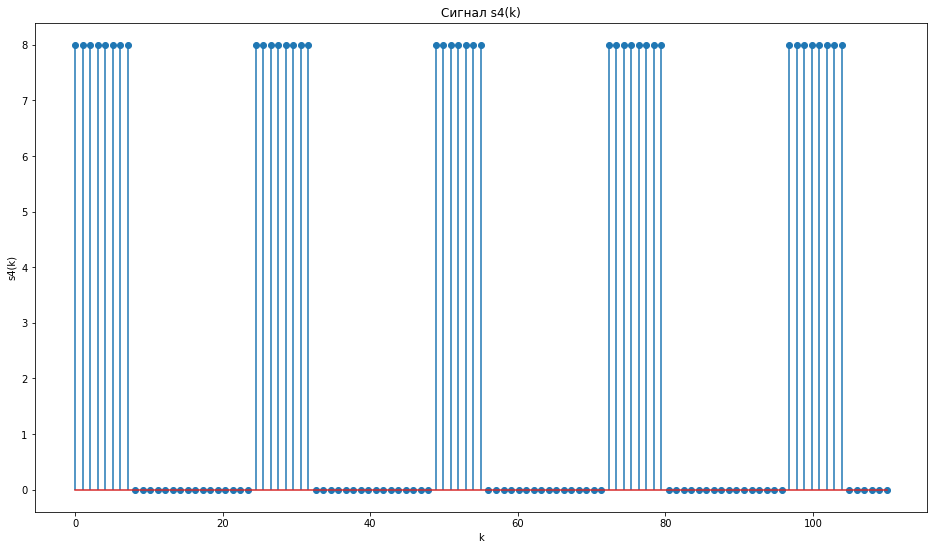

In [11]:
s4 = lambda x: U * sigma_d(x) if x % (n_imp * 3) < n_imp else 0

k = np.linspace(0, 110, 109)

plt.figure(figsize=(16, 9))
plt.stem(k, [s4(i) for i in k], use_line_collection=True)
plt.xlabel("k")
plt.ylabel("s4(k)")
plt.title("Сигнал s4(k)")
plt.show()

### Выводы

В ходе выполнения лабораторной работы было изучено математическое описание линейных комбинаций дискретных гармонических сигналов, смоделированы на практике дискретный прямоугольный импульс, линейная комбинация дискретных гармонических сигналов, дискретный сигнал, представляющий собой дискретный гармонический сигнал с экспоненциальной огибающей, периодическая последовательность дискретных прямоугольных импульсов.